In [1]:
import numpy as np
import pandas as pd
from os.path import join
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [2]:
RECORDING_DIR = "recordings"
OUTPUT_DIR = "output_wav"
MECH_READINGS_FILE = "mechanical_sensor.csv"
SOUND_READINGS_FILE = "sound_sensor.csv"

In [3]:
mech_cols = ["date", "time", "x1", "rainfall (mm)"]
mech_cols_desired = ["datetime", "x1", "rainfall (mm)"]
sound_cols = ["date", "time", "sound", "loudness"]
sound_cols_desired = ["datetime", "sound", "loudness"]
col_names = ["raw_audio", "filtered_audio"]

In [20]:
mech_file_path = join(RECORDING_DIR, MECH_READINGS_FILE)
mech_data = pd.read_csv(mech_file_path, names=mech_cols)

sound_file_path = join(RECORDING_DIR, SOUND_READINGS_FILE)
sound_data = pd.read_csv(sound_file_path, names=sound_cols)

In [21]:
cutoff_value = 0.28

In [22]:
def process_mech_data(df):
    df["datetime"] = df["date"]+" "+df["time"]
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.drop(["date", "time"], axis=1)
    df = df[mech_cols_desired]
    df["rainfall (mm)"] = df["rainfall (mm)"].str.split(" ").str[1]
    df["rainfall (mm)"] = df["rainfall (mm)"].astype(float)
    df = df[df["rainfall (mm)"]>cutoff_value]
    return df

In [23]:
def process_sound_data(df):
    df["time"] = df["time"].str.split(":").str[:-1].str.join(":")
    df["date"] = df["date"].str.split("/").str[::-1].str.join("-")
    df["datetime"] = df["date"]+" "+df["time"]
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.drop(["date", "time"], axis=1)
    df = df[sound_cols_desired]
    df["sound"] = df["sound"].astype(float)
    df["loudness"] = df["loudness"].astype(float)
    return df

In [24]:
mech_data = process_mech_data(mech_data)
sound_data = process_sound_data(sound_data)

In [25]:
timepoints = list(set(sound_data["datetime"]).intersection(mech_data["datetime"]))
sound_data = sound_data.loc[sound_data["datetime"].isin(timepoints)]
mech_data = mech_data.loc[mech_data["datetime"].isin(timepoints)]

In [26]:
data_merged = pd.merge(mech_data, sound_data, on="datetime", how="inner")

In [27]:
data_merged

,datetime,x1,rainfall (mm),sound,loudness
0,2023-10-03 22:52:00,2,0.56,378.0,137.0
1,2023-10-03 22:53:00,2,0.56,360.0,128.0
2,2023-10-03 23:29:00,4,1.12,380.0,141.0
3,2023-10-04 02:38:00,3,0.84,388.0,142.0
4,2023-10-04 02:39:00,3,0.84,390.0,141.0
5,2023-10-04 02:40:00,4,1.12,388.0,147.0
6,2023-10-04 02:41:00,2,0.56,396.0,139.0


<Axes: xlabel='rainfall (mm)', ylabel='loudness'>

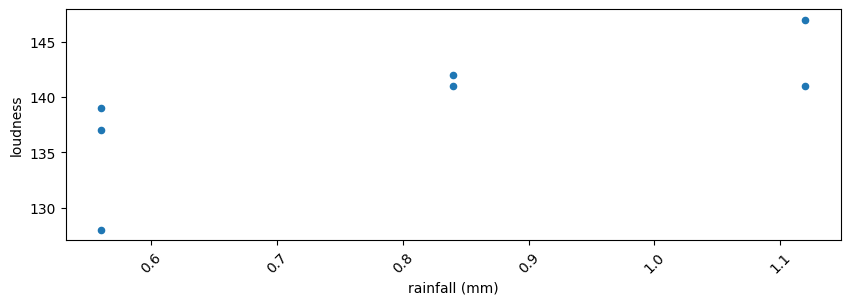

In [28]:
data_merged.plot(x="rainfall (mm)", y="loudness", kind='scatter', rot=45, figsize=(10,3))

In [29]:
data_merged.corr(method='pearson')

,datetime,x1,rainfall (mm),sound,loudness
datetime,1.000000,0.273382,0.273382,0.838586,0.677839
x1,0.273382,1.000000,1.000000,0.265357,0.737172
rainfall (mm),0.273382,1.000000,1.000000,0.265357,0.737172
sound,0.838586,0.265357,0.265357,1.000000,0.789777
loudness,0.677839,0.737172,0.737172,0.789777,1.000000


In [30]:
data_merged.corr(method='spearman')

,datetime,x1,rainfall (mm),sound,loudness
datetime,1.000000,0.264575,0.264575,0.900937,0.540562
x1,0.264575,1.000000,1.000000,0.152554,0.839047
rainfall (mm),0.264575,1.000000,1.000000,0.152554,0.839047
sound,0.900937,0.152554,0.152554,1.000000,0.472727
loudness,0.540562,0.839047,0.839047,0.472727,1.000000


In [15]:
# mech_data.plot(x="datetime", y="rainfall (mm)", kind='scatter', rot=45, figsize=(10,3))

In [16]:
# def normalize_signal(x):
#     x /= np.max(np.abs(x),axis=0)
#     x -= 0.5
#     return x

In [17]:
# Fs = 9600 #115200
# raw_audio = normalize_signal(raw_audio)
# filtered_audio = normalize_signal(filtered_audio)
# N = len(raw_audio)
# time = np.linspace(0, N/Fs, N)

In [18]:
# plt.figure(figsize=(15,4))
# plt.plot(time, raw_audio, label="raw_audio")
# plt.plot(time, filtered_audio, label="filterd_audio")
# plt.xlabel("time")
# plt.ylabel("Amplitude")
# plt.legend()

In [19]:
# wav_file_path = join(OUTPUT_DIR, "test_raw.wav")
# write(wav_file_path, Fs, raw_audio)